In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Statement

ABC is riding platform aiming to provide affordable, comfortable for everyone.
The challenge they have faced is the attrition of the ABC driver due to various reason and this increases the churn rate. Since ABC business is big and drivers are stop working on the fly, it is difficult for the old to find new drivers immediately. The expensive of recruting new driver more than retaining them in the job.


As a data scientist ola's Analytical department, need to find the reason of attrition base on drive's behavior, performance and satisfaction which would help the business to take praoctive measure to reduce the churn rate. Also need to create a Machine Learning model which would predict driver churn, so that measure can be taken to retain them.

## 1.a Observation on data

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Scaler_case_study/Ensemble_ola_churn/ola_driver_scaler.csv")

In [6]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [7]:
data.shape

(19104, 14)

**Shape of the data:**

* There are 19104 records and 14 features present in the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [9]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


**Basic information:**

* There is a column Unnamed: 0 which has no information, so need to remove it.
*  MMM-YY, Dateofjoining, LastWorkingDate should be converted into the datatype datetime which is needed to analyze the dates from the dataset
* It seems no outlier present in the dataset. Detailed analysis is further needed to proof it.
* The average age of the driver is 34.
* The minimum income is 10747, average income is 65652 which are quite good in terms of salary. But further analysis is needed on how many driving are holding the minimum salary

In [10]:
import datetime
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

<ipython-input-10-3a392aaea13c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['MMM-YY'] = pd.to_datetime(data['MMM-YY'])
<ipython-input-10-3a392aaea13c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
<ipython-input-10-3a392aaea13c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  datetime64[ns]
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [12]:
data1=data.copy()

In [ ]:
data.drop("Unnamed: 0", axis=1,inplace = True)

In [ ]:
#data.rename(columns={"MMM-YY":"Monthly reporting date"})
data.drop("MMM-YY",axis=1,inplace=True)

**Basic Operations:**
* Date of joining and Last working day are converted into datetime data type
* Dropped the random feature "Unnamed: 0"
* Drop the Monthly reporting date to aggregate the driver id

### Aggregating the driver_id to derive patterns

In [ ]:
col = data.columns
for i in col:
  print(i,":",data[['Driver_ID',i]].drop_duplicates().shape[0])

Driver_ID : 2381
Age : 3800
Gender : 2432
City : 2381
Education_Level : 2381
Income : 2425
Dateofjoining : 2381
LastWorkingDate : 3895
Joining Designation : 2381
Grade : 2425
Total Business Value : 14661
Quarterly Rating : 4023


* There are 2381 unique driveid, but there are more than one value present for the feature like Age, Gender, Income, Last Working Date, Grade, total business value, Quarterly rating
* It is nothing but the changes in the value in each month in each driver id .
* To make it as single value of each feature, groupby operation is used.

In [ ]:
df1 = data.groupby("Driver_ID")["Age"].mean().reset_index()

Average age can be taken from each month, because it will work to aggregate the change in age in month basis

In [ ]:
df2 = data.groupby("Driver_ID")['Gender'].agg(pd.Series.mode).reset_index()

Different gender value for each driver id seems like error because gender cant be change on month basis. So most frequent gender is used for the aggregation

In [ ]:
df3 = data.groupby('Driver_ID')['Income'].mean().reset_index()

Even though income of the driver change for every month, average income can be used for the aggregation

Last working day is found in the last month of each unique driver id and all other months we have replaced with 0. So this case maximum of last working day can be used for each driver id.

In [ ]:
df4 = data.groupby('Driver_ID')['Grade'].max().reset_index()

Maximum of grade can be taken as the aggregate function

In [ ]:
df5 = data.groupby("Driver_ID")["Quarterly Rating"].agg(pd.Series.median).reset_index()

Since Average of Quaterly rating will result in low value if there is more difference between min and max value. we take the medain.

In [ ]:
df6 = data.groupby('Driver_ID')['Total Business Value'].sum().reset_index()

In [ ]:
df7 = data.groupby('Driver_ID')['LastWorkingDate'].max().reset_index()

In [ ]:
df7

,Driver_ID,LastWorkingDate
0,1,2019-03-11
1,2,NaT
2,4,2020-04-27
3,5,2019-03-07
4,6,NaT
...,...,...
2376,2784,NaT
2377,2785,2020-10-28
2378,2786,2019-09-22
2379,2787,2019-06-20


Business values of a particular driver can be both positive and negative. so we can add all the value which will give the networth of the driver

In [ ]:
data.drop(['LastWorkingDate','Grade','Total Business Value','Quarterly Rating','Age','Income','Gender'],inplace=True,axis=1)

In [ ]:
data.drop_duplicates(inplace=True)

###Merge all columns with the original data

In [ ]:
data = data.merge(df7.merge(df6.merge(df5.merge(df4.merge(df3.merge(df1.merge(df2,on="Driver_ID"),on="Driver_ID"),on="Driver_ID"),on="Driver_ID"),on="Driver_ID"),on="Driver_ID"),on="Driver_ID")

In [ ]:
data.shape

(2381, 12)

### Creating target variable

* Since the target column is not present in the dataset, we can create using LastWorkingDate if present it means they are churn, if LastWorkingDate is absent, they are non churn
* Create a column Target and mark it 1 for churn and 0 for non churn

In [ ]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
data["LastWorkingDate"] = data["LastWorkingDate"].isnull().astype(int)

In [ ]:
data.rename(columns = {'LastWorkingDate':'Target'},inplace = True)

### Missing values

In [ ]:
data.isnull().sum()/data.shape[0]*100

Driver_ID               0.0
City                    0.0
Education_Level         0.0
Dateofjoining           0.0
Joining Designation     0.0
Target                  0.0
Total Business Value    0.0
Quarterly Rating        0.0
Grade                   0.0
Income                  0.0
Age                     0.0
Gender                  0.0
dtype: float64

**Missing Values**

* After creating the LastWorkingDate as Target and doing the aggregation the columns, there is no missing value in the dataset

### Seperate the numerical and categorical feature into seperate dataframe

In [ ]:
num_data = data.select_dtypes(include = ["int","float"])
cat_data = data.select_dtypes(include = ["object"])
date_time_data = data.select_dtypes(include = ["datetime64[ns]"])

## 1.c Univariate Analysis

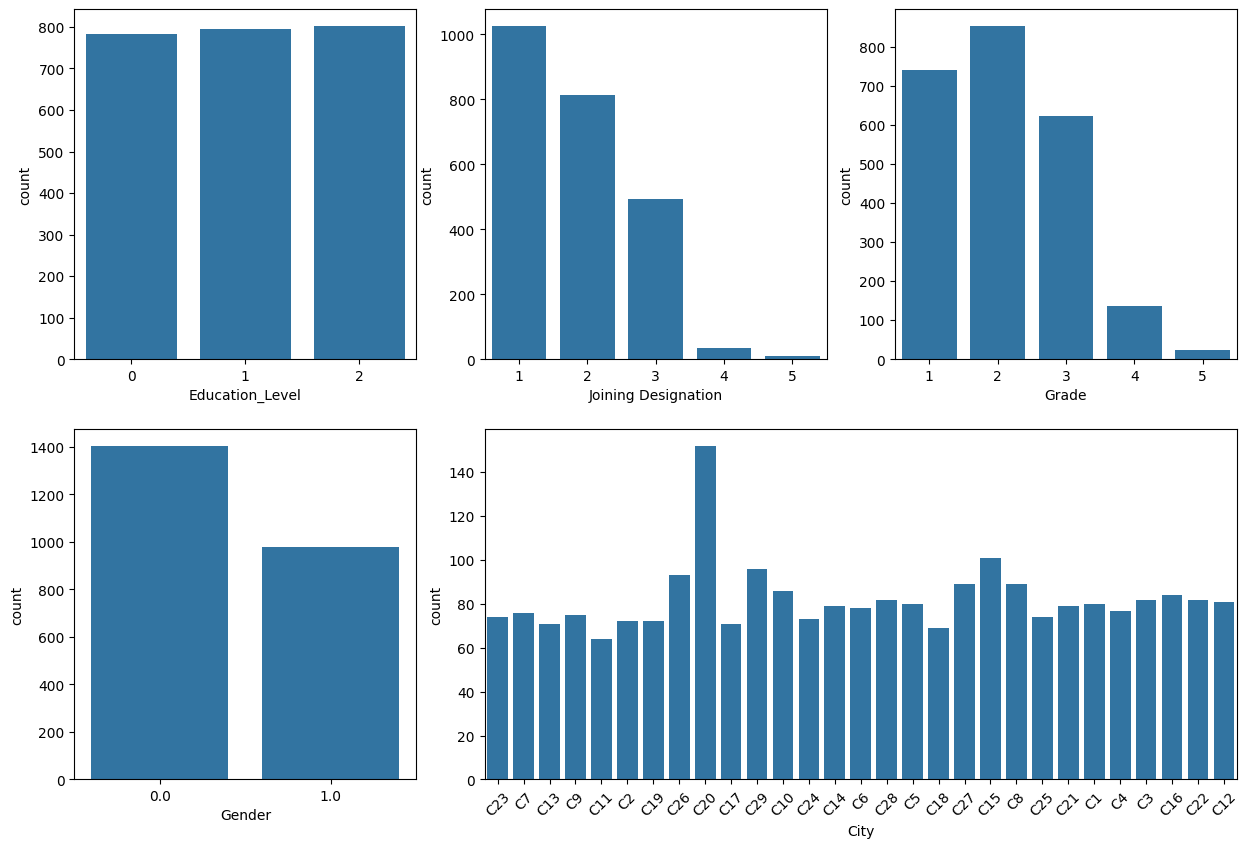

In [ ]:
plt.figure(figsize =(15,10))
plot_count=['Education_Level','Joining Designation','Grade','Gender']
for index, elem in enumerate(plot_count):
  plt.subplot(2,3,index+1)
  sns.countplot(data = data, x = elem)
plt.subplot2grid((2, 3), (1, 1), colspan=2)
sns.countplot(data = data, x = 'City')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
data["Joining Designation"].value_counts(normalize = True)

Joining Designation
1    0.430911
2    0.342293
3    0.207056
4    0.015120
5    0.004620
Name: proportion, dtype: float64

In [ ]:
data["Gender"].value_counts(normalize = True)

Gender
0.0    0.589668
1.0    0.410332
Name: proportion, dtype: float64

**Insights**

**Distribution of Education Qualification**
* The dataset shows an almost equal number of drivers with 10th, 12th, and graduate qualifications.
* This indicates that drivers joining the company comes from a diverse range of educational backgrounds.

**Distribution of Joining Designation**
* There are 5 designation for the drivers from 1 to 5 depending upon their experience, 1-low and 5-high.
* 43% of the drivers are with the designation 1, 34% with 2, 20% with 3, 1% with 4 and 0.4% with 5
* From this most of the drivers have less experience. Mose of the drivers are leaving the job after the designation 3

**Distribution of Grade**
* Similar to Joining Designation, grade of the drivers are more in the Grade 1,2,3.

**Distribution of Gender**
* There are 59% of male drivers and 41% of female drivers.
* Almost equal number of female drivers are also joining in the company

**Distribution of City**
* City C20 has more number of drivers

<Axes: xlabel='Target', ylabel='count'>

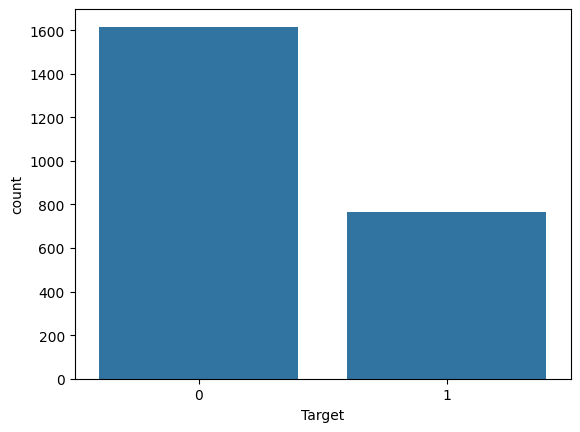

In [ ]:
sns.countplot(data,x='Target')

In [ ]:
data['Target'].value_counts("normalize=True")

Target
0    0.678706
1    0.321294
Name: proportion, dtype: float64

* Around 32% of drivers are became churn in the dataset

<Axes: xlabel='Total Business Value', ylabel='Count'>

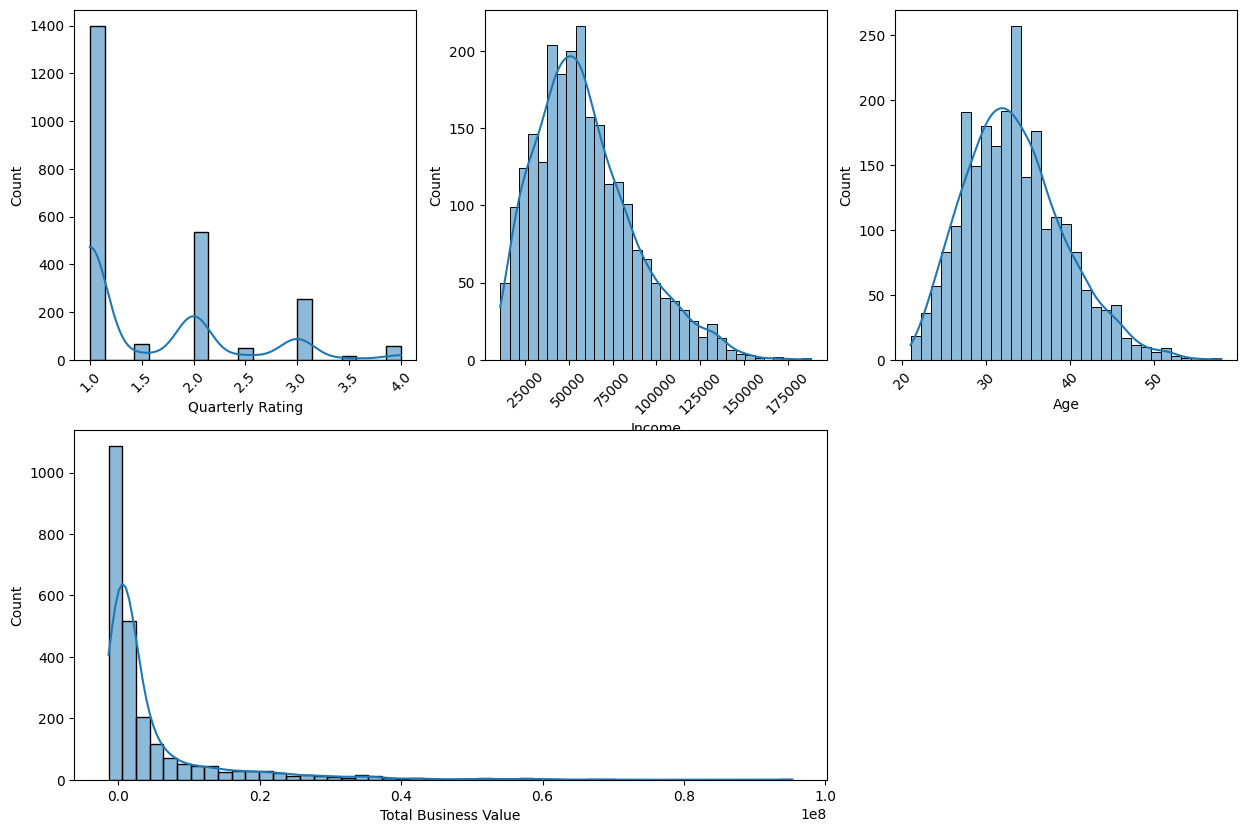

In [ ]:
plt.figure(figsize =(15,10))
plot_count=['Quarterly Rating','Income', 'Age']
for index, elem in enumerate(plot_count):
  plt.subplot(2,3,index+1)
  plt.xticks(rotation=45)
  sns.histplot(data = data, x = elem,kde=True)
plt.subplot2grid((2, 3), (1, 0), colspan=2)
sns.histplot(data = data, x = 'Total Business Value',kde=True,bins = 50)

**Distribution of Quaterly rating**
* Distribution of rating is Right skewed, so most of the rating are around the rating 1 and 2

**Distribution of Income**
* Income is normally distributed with average income of 50000

**Distribution of Age**
* Age is normally distributed with the average drive age of 34

**Distribution of Business Income**
* Distribution of Business Income is Right skewed with most of the value is around 1000000 and outlier is also present

## 1.d Bivariate Analysis

How long the driver worked

outlier - boxplot

In [ ]:
pd.crosstab(data["Education_Level"], data["Quarterly Rating"])

Quarterly Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0
Education_Level,,,,,,,
0,494,19,164,14,70,6,17
1,446,21,190,20,91,9,18
2,457,27,183,17,95,2,21


* Rating is higher for the education level 1 which is 12th

<Axes: xlabel='Education_Level', ylabel='Income'>

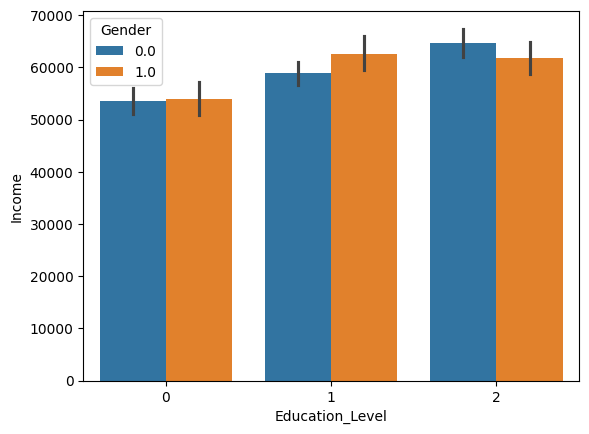

In [ ]:
sns.barplot(data=data, x = "Education_Level", y = "Income",hue = "Gender")

* Income for Education level 2 which is graduate is higher.
* Graduate Female driver has high average income than Graduate male driver

<Axes: xlabel='Education_Level', ylabel='Total Business Value'>

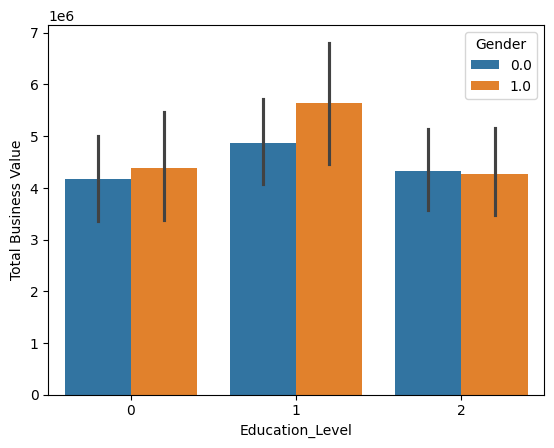

In [ ]:
sns.barplot(data=data, x = "Education_Level", y = "Total Business Value",hue = "Gender")

* Total business value is higher for 12th male education level
* All other eduction level, business value is almost same



### Correlation Graph

<Axes: xlabel='Income', ylabel='Total Business Value'>

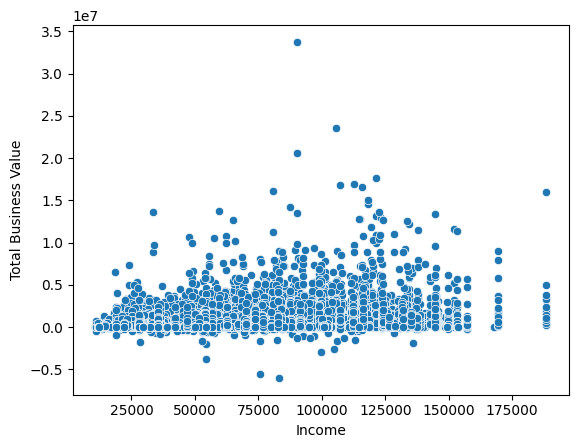

In [ ]:
sns.scatterplot(x="Income", y = "Total Business Value", data = data1)

* Income from 50000 to 100000 has more negative business value,they have most of the cancellation, refund, car emi.

<Axes: xlabel='Age', ylabel='Total Business Value'>

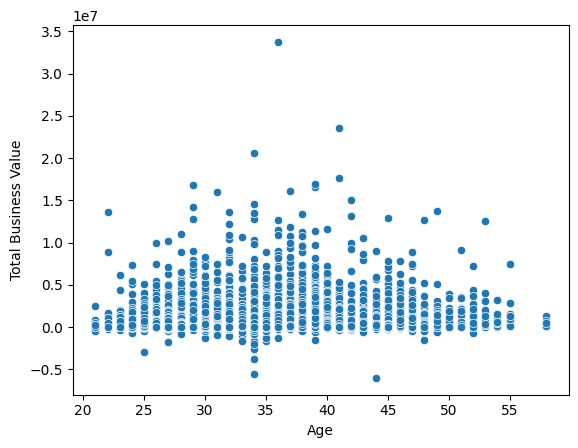

In [ ]:
sns.scatterplot(x="Age", y = "Total Business Value", data = data1)

* Drivers with the age around 35 has negative business values, they have most of the cancellation, refund, car emi.

<Axes: xlabel='Age', ylabel='Income'>

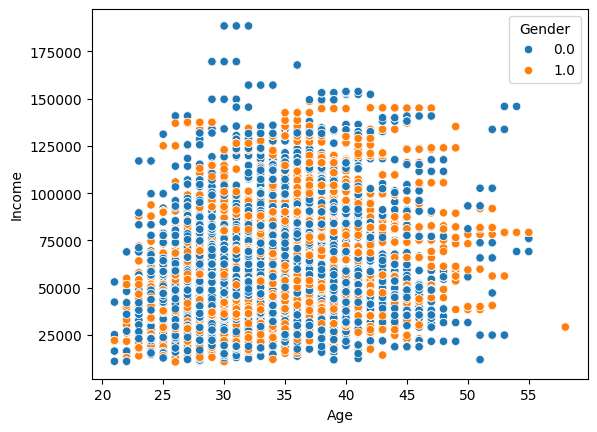

In [ ]:
sns.scatterplot(x="Age", y = "Income", data = data1,hue = "Gender")

* Income is equaly disributed across all ages

In [ ]:
monthwise_driver_count = data1.groupby("MMM-YY")["Driver_ID"].count().reset_index()
monthwise_business_value = data1.groupby("MMM-YY")["Total Business Value"].sum().reset_index()

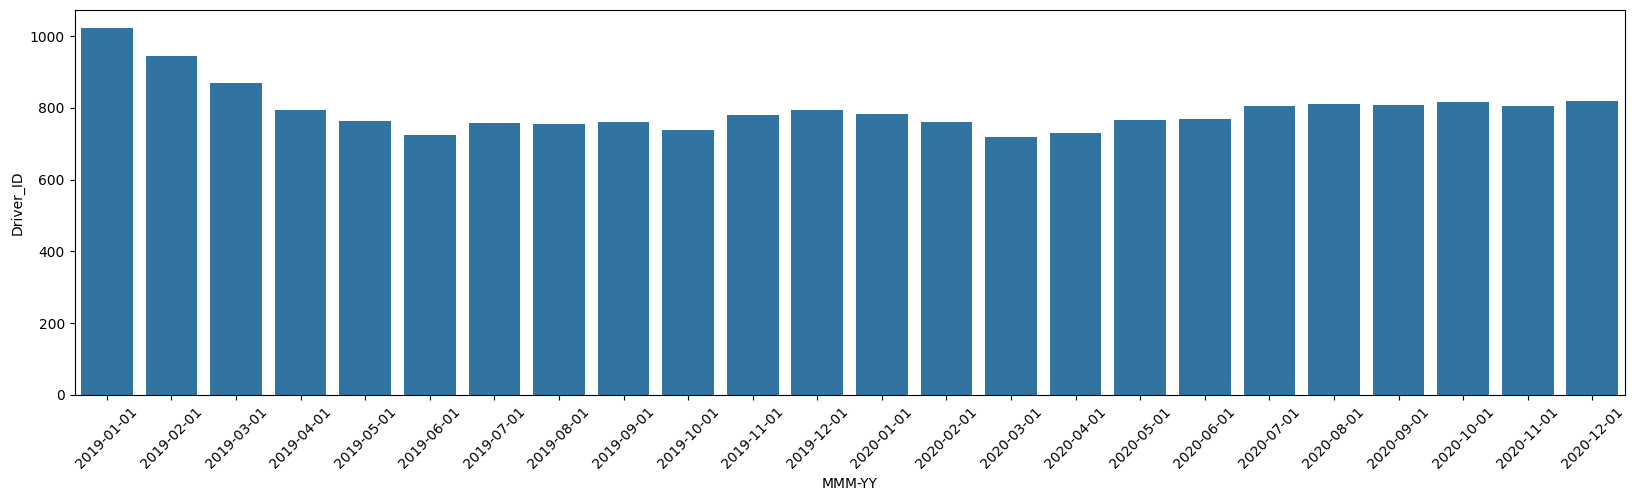

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data = monthwise_driver_count,x= "MMM-YY", y = "Driver_ID")
plt.xticks(rotation=45)
plt.show()

**Monthwise Distribution of Driver Count**

* Number of drivers gradually decreasing from starting date to end date

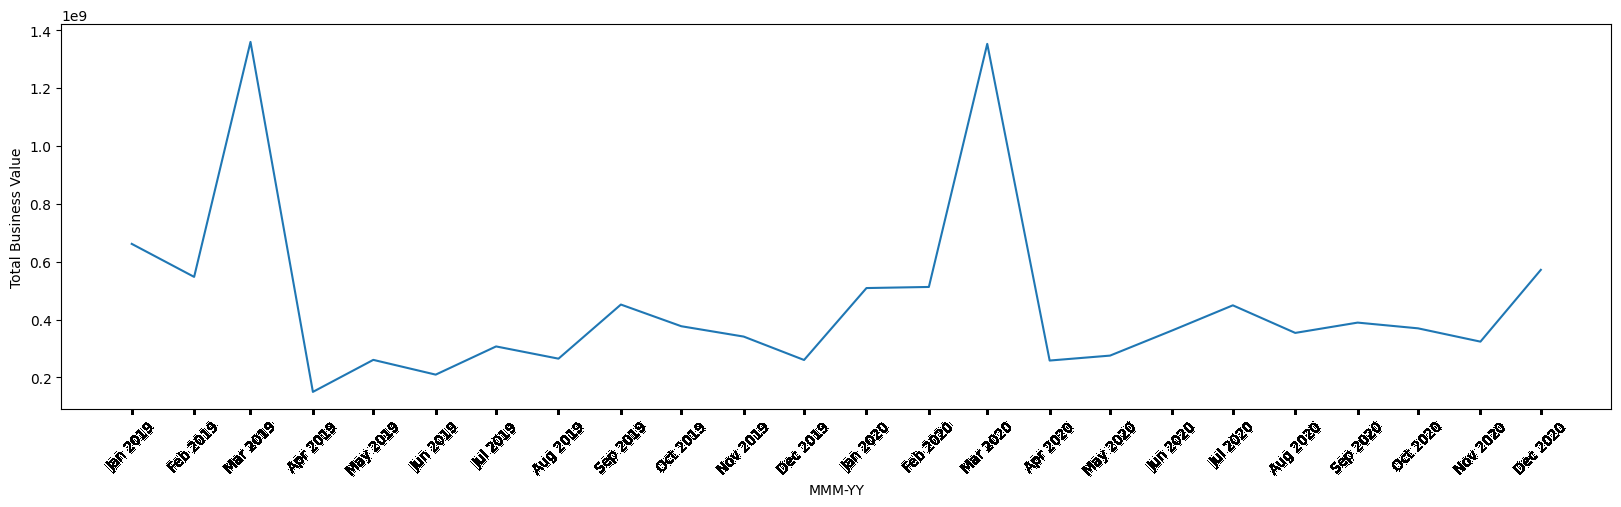

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = monthwise_business_value,x= "MMM-YY", y = "Total Business Value")

plt.xticks(ticks=data1['MMM-YY'], labels=data1['MMM-YY'].dt.strftime('%b %Y'), rotation=45)

plt.show()

**Monthwise Distribution of total business value**

* The graph shows the monthwise business value after subtracting any cancellation, refund, car emi amount
* There is seasonility occur in the month of March where the value increased large amount


## 1.f Finding outlier

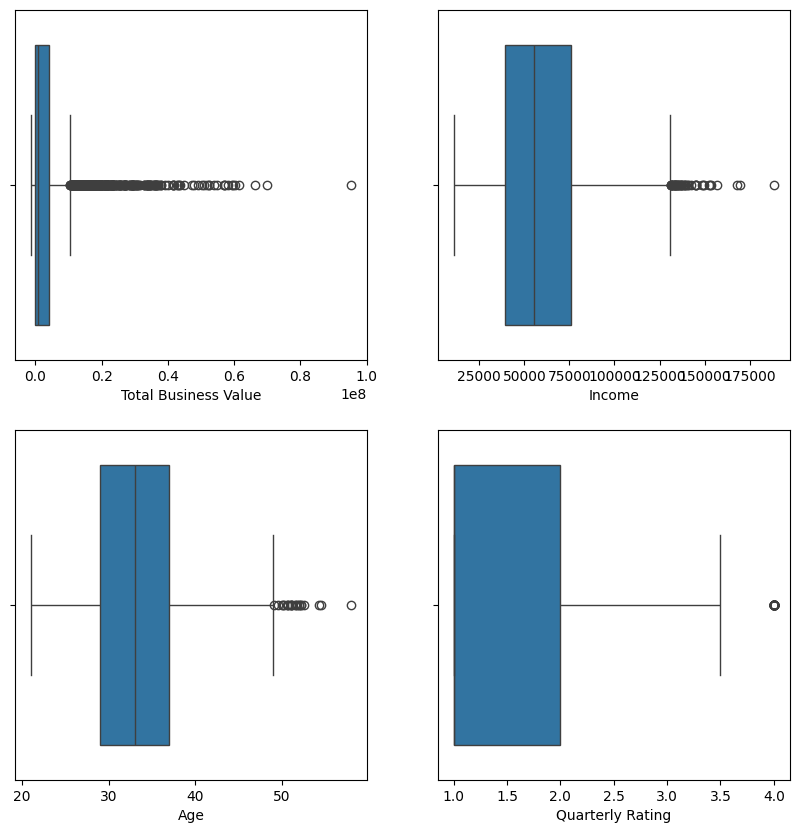

In [ ]:
plt.figure(figsize = (10,10))
outlier_col = ["Total Business Value", "Income","Age","Quarterly Rating"]
for index, elem in enumerate(outlier_col):
  plt.subplot(2,2,index+1)
  sns.boxplot(data = data, x = elem)

In [ ]:
data.describe()

,Driver_ID,Education_Level,Dateofjoining,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender
count,2381.000000,2381.00000,2381,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,1.00756,2019-02-08 07:14:50.550189056,1.820244,0.321294,4.586742e+06,1.575178,2.097018,59232.460484,33.369298,0.410332
min,1.000000,0.00000,2013-04-01 00:00:00,1.000000,0.000000,-1.385530e+06,1.000000,1.000000,10747.000000,21.000000,0.000000
25%,695.000000,0.00000,2018-06-29 00:00:00,1.000000,0.000000,0.000000e+00,1.000000,1.000000,39104.000000,29.000000,0.000000
50%,1400.000000,1.00000,2019-07-21 00:00:00,2.000000,0.000000,8.176800e+05,1.000000,2.000000,55285.000000,33.000000,0.000000
75%,2100.000000,2.00000,2020-05-02 00:00:00,2.000000,1.000000,4.173650e+06,2.000000,3.000000,75835.000000,37.000000,1.000000
max,2788.000000,2.00000,2020-12-28 00:00:00,5.000000,1.000000,9.533106e+07,4.000000,5.000000,188418.000000,58.000000,1.000000
std,806.161628,0.81629,NaN,0.841433,0.467071,9.127115e+06,0.797855,0.941702,28298.214012,5.890567,0.491997


**Points from boxplot for outlier detection**
* Income and Business value outlier should be treated
* Age: Maximum age is 58. This cannot be considered as outlier. So we will as it is.
* Quarterly rating 4 is also not the outlier

In [ ]:
data_eda = data.copy()

In [ ]:
data.shape

(2381, 12)

# 2. Data Preprocessing

## 2.a Duplicate values check

In [ ]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Driver_ID,City,Education_Level,Dateofjoining,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender


* There is no duplicated rows in the dataset

## 2.b Outlier Treatment

### Income

In [ ]:
Q1 = data_eda['Income'].quantile(0.25)
Q3 = data_eda['Income'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_eda[(data_eda['Income'] < lower_bound) | (data_eda['Income'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers["Income"])

Q1: 39104.0
Q3: 75835.0
IQR: 36731.0
Lower Bound: -15992.5
Upper Bound: 130931.5
Outliers:
38      131347.00
98      144978.00
130     148588.00
200     139139.00
226     134529.00
257     188418.00
276     133752.00
283     140769.00
301     135879.00
326     137082.00
331     133783.00
412     132558.00
481     152234.00
550     139347.50
608     135436.00
744     134302.00
882     135414.00
884     138069.00
945     153109.00
1050    133978.00
1083    136744.75
1133    157124.00
1237    135337.00
1489    149637.00
1502    149354.00
1552    145483.00
1557    136307.00
1577    140833.00
1613    132819.00
1784    139882.00
1794    131847.00
1831    153766.00
1845    133579.00
1862    145116.00
1922    133489.00
1925    138520.00
1997    131168.00
2012    131567.00
2026    136960.00
2048    167758.00
2051    132505.00
2063    169549.00
2120    142543.00
2158    137450.00
2212    131568.00
2351    144726.00
2358    131805.00
Name: Income, dtype: float64


In [ ]:
data_eda['Income'] = data_eda["Income"].where(data_eda['Income']<=upper_bound,upper_bound)

In [ ]:
data[(data_eda['Income'] < lower_bound) | (data_eda['Income'] > upper_bound)]

,Driver_ID,City,Education_Level,Dateofjoining,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender


<Axes: ylabel='Income'>

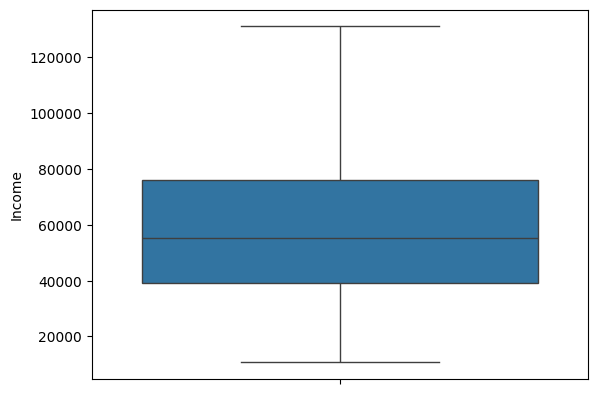

In [ ]:
sns.boxplot(data_eda['Income'])

* In income column there are 94 datapoints greater than 75 percentile of the upper bound
* Those data points are replaced by capping method by the upper bound

### Total Business Value

In [ ]:
Q1 = data_eda['Total Business Value'].quantile(0.25)
Q3 = data_eda['Total Business Value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_eda[(data['Total Business Value'] < lower_bound) | (data_eda['Total Business Value'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers["Total Business Value"])

Q1: 0.0
Q3: 4173650.0
IQR: 4173650.0
Lower Bound: -6260475.0
Upper Bound: 10434125.0
Outliers:
17      36351110
18      69867900
29      21755910
40      33823290
42      11723470
          ...   
2342    20843460
2351    61583040
2363    25164110
2366    19597020
2376    21748820
Name: Total Business Value, Length: 336, dtype: int64


In [ ]:
data_eda['Total Business Value'] = data_eda["Total Business Value"].where(data_eda['Total Business Value']<=upper_bound,upper_bound)

In [ ]:
data_eda[(data['Total Business Value'] < lower_bound) | (data_eda['Total Business Value'] > upper_bound)]

,Driver_ID,City,Education_Level,Dateofjoining,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender


<Axes: ylabel='Total Business Value'>

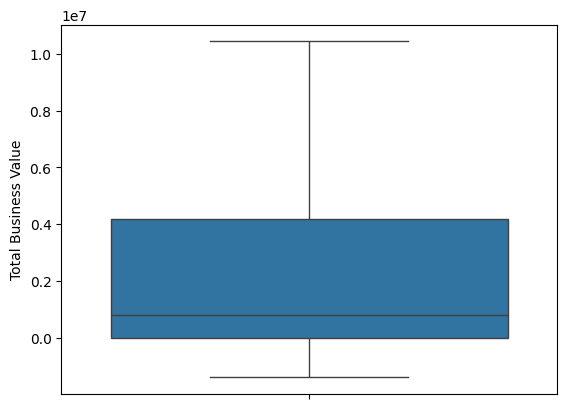

In [ ]:
sns.boxplot(data_eda['Total Business Value'])

* In Total business value column there are 506 datapoints greater than 75 percentile of the upper bound
* Those data points are replaced by capping method by the upper bound

## 2.c Creating new columns - feature engineering

* Different age groups can be formed as 'Young' (18-30), 'Middle-aged' (31-50), 'Senior' (50+). So it can be used to analyze the pattern

In [ ]:
bins = [18,30,50,float('inf')]
labels = ["Young","Middle-aged","Senior"]
data_eda["Age_group"]=pd.cut(data_eda["Age"],bins=bins,labels=labels)

In [ ]:
data_eda.head()

,Driver_ID,City,Education_Level,Dateofjoining,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender,Age_group
0,1,C23,2,2018-12-24,1,0,1715580,2.0,1,57387.0,28.0,0.0,Young
1,2,C7,2,2020-11-06,2,1,0,1.0,2,67016.0,31.0,0.0,Middle-aged
2,4,C13,2,2019-12-07,2,0,350000,1.0,2,65603.0,43.0,0.0,Middle-aged
3,5,C9,0,2019-01-09,1,0,120360,1.0,1,46368.0,29.0,0.0,Young
4,6,C11,1,2020-07-31,3,1,1265000,2.0,3,78728.0,31.0,1.0,Middle-aged


In [ ]:
data_eda.shape

(2381, 13)

### Which age group of drivers became churn?

<Axes: xlabel='Age_group', ylabel='count'>

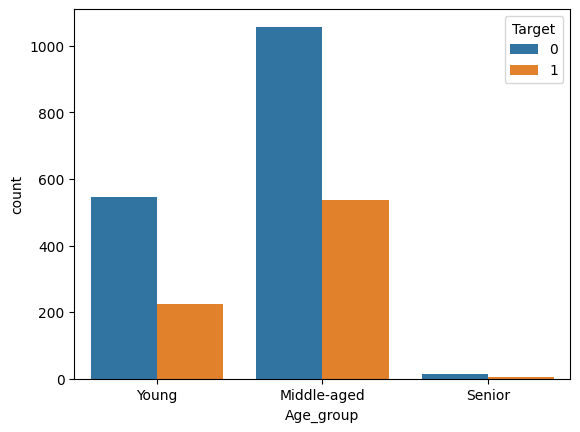

In [ ]:
sns.countplot(data_eda,x="Age_group",hue="Target")

* More Middle aged group drivers are becoming churn

In [ ]:
data_eda.drop('Dateofjoining',axis = 1,inplace=True)

In [ ]:
data_final = data_eda.copy()

In [ ]:
data_final.to_csv('data_final.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data_final = pd.read_csv("/content/drive/MyDrive/Scaler_case_study/Ensemble_ola_churn/data_final.csv")

In [3]:
data_final.head()

,Unnamed: 0,Driver_ID,City,Education_Level,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender,Age_group
0,0,1,C23,2,1,0,1715580,2.0,1,57387.0,28.0,0.0,Young
1,1,2,C7,2,2,1,0,1.0,2,67016.0,31.0,0.0,Middle-aged
2,2,4,C13,2,2,0,350000,1.0,2,65603.0,43.0,0.0,Middle-aged
3,3,5,C9,0,1,0,120360,1.0,1,46368.0,29.0,0.0,Young
4,4,6,C11,1,3,1,1265000,2.0,3,78728.0,31.0,1.0,Middle-aged


1. What percentage of drivers have received a quarterly rating of 4?

In [13]:
data1[data1["Quarterly Rating"]==5]["Driver_ID"].nunique()

0

In [14]:
(data1[data1["Quarterly Rating"]==4]["Driver_ID"].nunique()/data1["Driver_ID"].nunique())*100

14.279714405711886

* There is no driver with Quarterly rating of 5
* 14% of the driver has the Quarterly rating of 4

2. Comment on the correlation between Age and Quarterly Rating.2

### Heat Map

<Axes: >

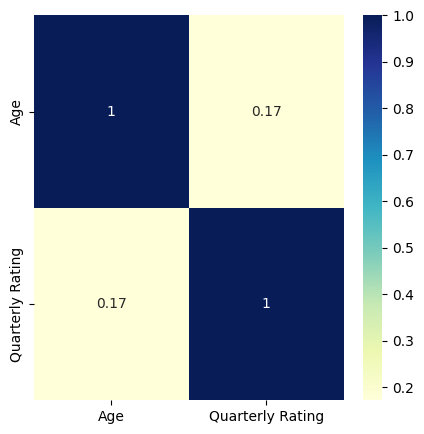

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(data1[["Age","Quarterly Rating"]].corr(), cmap="YlGnBu", annot=True)

* The correlation between Age and Quaterly Rating is less which is 0.17

Find the city with most improvement in Quarterly Rating

In [45]:
data1["Quarter"] = data1["MMM-YY"].dt.to_period("Q")
quarterly_ratings_city = data1.groupby(['City', 'Quarter'])['Quarterly Rating'].mean().reset_index()

In [30]:
df_pivot = quarterly_ratings_city.pivot(index='City', columns='Quarter', values='Quarterly Rating')
df_pivot['2019_Q2_improvement'] = df_pivot[df_pivot.columns[1]] - df_pivot[df_pivot.columns[0]]
df_pivot['2019_Q3_improvement'] = df_pivot[df_pivot.columns[2]] - df_pivot[df_pivot.columns[1]]
df_pivot['2019_Q4_improvement'] = df_pivot[df_pivot.columns[3]] - df_pivot[df_pivot.columns[2]]
df_pivot['2020_Q1_improvement'] = df_pivot[df_pivot.columns[4]] - df_pivot[df_pivot.columns[3]]
df_pivot['2020_Q2_improvement'] = df_pivot[df_pivot.columns[5]] - df_pivot[df_pivot.columns[4]]
df_pivot['2020_Q3_improvement'] = df_pivot[df_pivot.columns[6]] - df_pivot[df_pivot.columns[5]]
df_pivot['2020_Q4_improvement'] = df_pivot[df_pivot.columns[7]] - df_pivot[df_pivot.columns[6]]

In [31]:
df_pivot['Total_Improvement'] = df_pivot[['2019_Q2_improvement', '2019_Q3_improvement', '2019_Q4_improvement','2020_Q1_improvement','2020_Q2_improvement', '2020_Q3_improvement', '2020_Q4_improvement']].sum(axis=1)

most_improved_city = df_pivot['Total_Improvement'].idxmax()
max_improvement = df_pivot['Total_Improvement'].max()

print(f"The city with the most improvement in Quarterly Rating over the past year is {most_improved_city} with a total improvement of {max_improvement}.")


The city with the most improvement in Quarterly Rating over the past year is C13 with a total improvement of 0.5872815533980584.


4. Which Grade Driver more likely to have a higher Total Business Value


In [35]:
data1.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

<Axes: xlabel='Grade', ylabel='Total Business Value'>

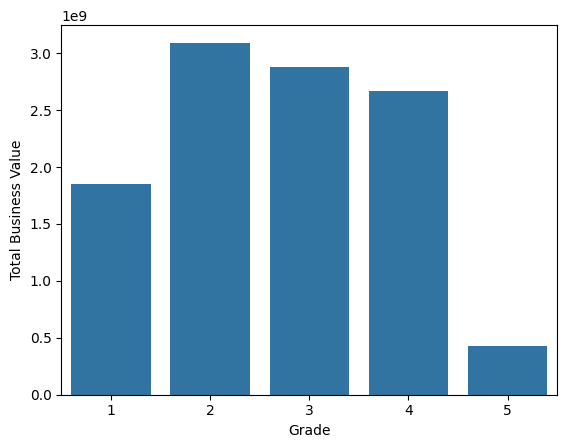

In [43]:
data_grade = data1.groupby("Grade")["Total Business Value"].sum().reset_index()
sns.barplot(data=data_grade,x="Grade",y="Total Business Value")

* Grade 2 has highest total business value

## 2.d Encoding

In [46]:
data_final["City"].nunique()

29

* Since City has 29 unique values, target encoding can be used

In [47]:
mean_target_per_city = data_final.groupby('City')['Target'].mean()
print("Mean target per city:\n", mean_target_per_city)

Mean target per city:
 City
C1     0.300000
C10    0.290698
C11    0.296875
C12    0.345679
C13    0.183099
C14    0.265823
C15    0.316832
C16    0.404762
C17    0.225352
C18    0.362319
C19    0.430556
C2     0.236111
C20    0.269737
C21    0.392405
C22    0.390244
C23    0.229730
C24    0.301370
C25    0.270270
C26    0.301075
C27    0.325843
C28    0.280488
C29    0.468750
C3     0.365854
C4     0.324675
C5     0.400000
C6     0.294872
C7     0.315789
C8     0.404494
C9     0.293333
Name: Target, dtype: float64


In [59]:
# Replace categories with mean target
data_final['City_encoded'] = data_final['City'].map(mean_target_per_city)


In [60]:
data_final.head()

,Unnamed: 0,Driver_ID,City,Education_Level,Joining Designation,Target,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender,Age_group,City_encoded
0,0,1,C23,2,1,0,1715580,2.0,1,57387.0,28.0,0.0,Young,0.229730
1,1,2,C7,2,2,1,0,1.0,2,67016.0,31.0,0.0,Middle-aged,0.315789
2,2,4,C13,2,2,0,350000,1.0,2,65603.0,43.0,0.0,Middle-aged,0.183099
3,3,5,C9,0,1,0,120360,1.0,1,46368.0,29.0,0.0,Young,0.293333
4,4,6,C11,1,3,1,1265000,2.0,3,78728.0,31.0,1.0,Middle-aged,0.296875


## 2.e Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = data_final.drop(["Driver_ID", "Target", "Age_group","Unnamed: 0","City"], axis = 1)
X_cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [62]:
X = pd.DataFrame(X)
X.columns = X_cols
X.head()

,Education_Level,Joining Designation,Total Business Value,Quarterly Rating,Grade,Income,Age,Gender,City_encoded
0,1.0,0.00,0.262369,0.333333,0.00,0.388070,0.189189,0.0,0.163245
1,1.0,0.25,0.117223,0.000000,0.25,0.468188,0.270270,0.0,0.464520
2,1.0,0.25,0.146834,0.000000,0.25,0.456432,0.594595,0.0,0.000000
3,0.0,0.00,0.127406,0.000000,0.00,0.296386,0.216216,0.0,0.385907
4,0.5,0.50,0.224248,0.333333,0.50,0.565639,0.270270,1.0,0.398305


# 3. Model Building

In [63]:
y = data_final["Target"]

# 3.a Data Splitting

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

In [65]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1904, 9)
X_test Shape:  (477, 9)
y_train Shape:  (1904,)
y_test Shape:  (477,)


## 3.b Treating Imbalance Data

Since the test data is 477 and train data is 1904, treat this using smote technique

In [66]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

print("Before SMOTE")
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)

print("After SMOTE")
print(y_sm.value_counts())




Before SMOTE
Target
0    1287
1     617
Name: count, dtype: int64
After SMOTE
Target
0    1287
1    1287
Name: count, dtype: int64


## 3.c Ensemble Learning Bagging

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [68]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 75.64 
 Validation: 70.66
K-Fold Accuracy Std: 
 Train: 0.58, 
 Validation: 7.89


In [69]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [70]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                                                               max_depth=10, max_features=8, n_estimators=200),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [71]:
random.fit(X, y)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 200, 'max_features': 10, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True}
Best score:  0.7740536156524925


In [72]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=3, max_features=8, n_estimators=100)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 71.989 
 Validation: 71.595
K-Fold Accuracy Std: 
 Train: 0.763, 
 Validation: 6.639


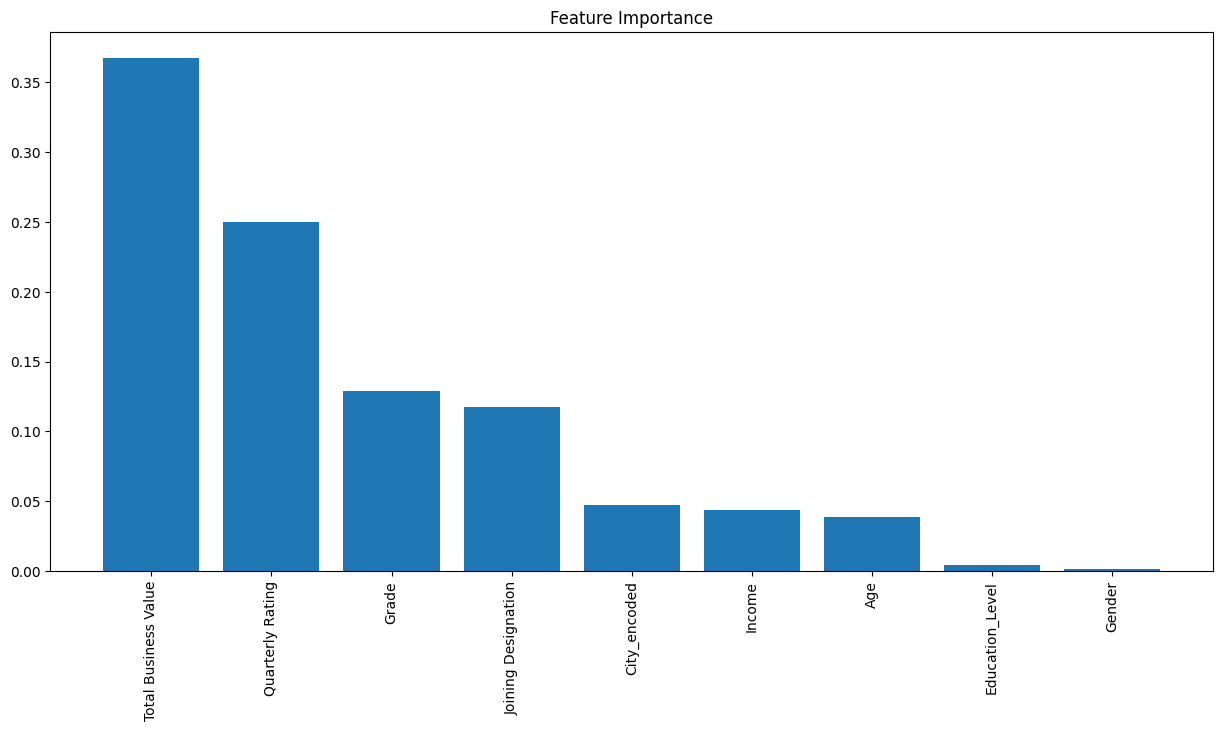

In [73]:
# Feature Importance

import matplotlib.pyplot as plt

rf_clf.fit(X_sm, y_sm)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## 3.d Ensembling Boosting

In [74]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [75]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt


gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_sm, y_sm)

end = dt.datetime.now()



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [76]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.7719502719502719 Rank: 4
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.2} Mean_score: 0.7684537684537686 Rank: 5
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.7766122766122766 Rank: 1
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.7626262626262627 Rank: 8
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.2} Mean_score: 0.7661227661227662 Rank: 6
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.7595182595182596 Rank: 9
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 5, 'learning_rate': 0.1} Mean_score: 0.7653457653457654 Rank: 7
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 3, 'learni

In [77]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:22.088959


In [78]:
print(clf.best_estimator_)

GradientBoostingClassifier(max_depth=7, max_leaf_nodes=80, n_estimators=200)


In [79]:
gbc = clf.best_estimator_

gbc.fit(X_sm, y_sm)

print("Model acc",gbc.score(X_test, y_test))



Model acc 0.7211740041928721
